In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon

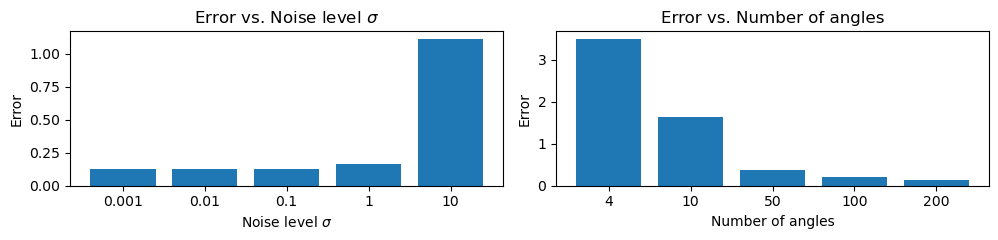

In [4]:
# define grid size for reconstruction
nx, na = 400, 400

def reconstruct_shepp_logan(theta, sigma):  
    phantom_image = shepp_logan_phantom()
    
    sinogram = radon(phantom_image, theta=theta)
    # create noisy sinogram
    noisy_sinogram = sinogram + sigma * np.random.randn(nx, len(theta))
    
    # perform the filtered back projection reconstruction
    reconstructed_image = iradon(noisy_sinogram, theta=theta)
    
    return reconstructed_image

def reconstruction_error(original, reconstructed):
    
    # compute the relative reconstruction error
    return np.linalg.norm(original - reconstructed) / np.linalg.norm(original)

#SLP for reference
reference_image = shepp_logan_phantom()

# evaluate reconstruction errors for different noise levels sigma
errors_sigma = {}
theta = np.linspace(0., 180., na)
noise_levels = [0.001, 0.01, 0.1, 1, 10]

for sigma in noise_levels:
    reconstructed_image = reconstruct_shepp_logan(theta, sigma)
    errors_sigma[str(sigma)] = reconstruction_error(reference_image, reconstructed_image)

# evaluate reconstruction errors for different numbers of angles theta
errors_na = {}
angle_counts = [4, 10, 50, 100, 200]

for na in angle_counts:
    theta = np.linspace(0., 180., na)
    reconstructed_image = reconstruct_shepp_logan(theta, sigma=0)  # No noise
    errors_na[str(na)] = reconstruction_error(reference_image, reconstructed_image)

fig, ax = plt.subplots(1, 2, figsize=(10, 2.5))

ax[0].bar(errors_sigma.keys(), errors_sigma.values())
ax[0].set_xlabel("Noise level $\sigma$")
ax[0].set_ylabel("Error")
ax[0].set_title("Error vs. Noise level $\sigma$")

ax[1].bar(errors_na.keys(), errors_na.values())
ax[1].set_xlabel("Number of angles")
ax[1].set_ylabel("Error")
ax[1].set_title("Error vs. Number of angles")

fig.tight_layout()

plt.savefig("/Users/Senne/Downloads/errorgraph.png")